In [96]:
import h5py
import matplotlib.pyplot as plt
import os
from os import listdir
from mpl_toolkits import mplot3d
import matplotlib.gridspec as gridspec
import numpy as np
import re

axisScale = 0.03
datasets = ['organic', 'gm_late', 'gm_early']

datasetNo = 0

# define storage arrays and reshape to hold all three galaxy type data
redshifts = np.array(range(3*24), dtype=float)
redshifts.shape = (3, 24)
kco_s = np.array(range(3*24), dtype=float)
kco_s.shape = (3, 24)

# Separate each star particle in each data set with '---'
for dataset in datasets:
    print('-----------------------------------------')
    print(dataset)
    print('-----------------------------------------')
    
    #Where to find the files
    files = listdir('C:\\Users\\katha\\GalaxyMorphology\\' + dataset)
    os.path.join("/C:", "Users","katha","GalaxyMorphology", dataset)

    #Start counting from 0
    count = 0

    #Reshape angular momentum - DO WE NEED THIS???
    galaxyAm = np.array(range(96), dtype=float).reshape(24,4)
    
    for file in files:
    #if 1==1:


    
        #Example file name (EXPLAIN FILE NAME STRUCTURE)
        #file = 'star_particles_015_z002p012.hdf5'
        #file = 'star_particles_028_z000p000.hdf5'
        
        # get redshift from the filename
        m = re.search('(z[0-9])\w+', file)
        s = m.group(0).replace('z', '')
        s = s.replace('p', '.')
        redshift = float(s)
        
        # load data for a particular galaxy at a particular redshift
        f = h5py.File('C:\\Users\\katha\\GalaxyMorphology\\' + dataset + '/' + file,'r')

        # extract coordinate, velocity and mass data from the file
        ds_c = f['Coordinates']
        ds_v = f['Velocity']
        ds_m = f['Mass']
        
         # Calculate the resultant angular momentum vectors j
        # j contains the AM vectors for each particle per redshift era
        j = np.cross(ds_c, ds_v)
        specAngMom = np.transpose(np.multiply(ds_m, np.transpose(j)))
        specAngMomTot = np.sum(specAngMom, axis=0)/(np.sum(ds_m))
        specAngMomTotMag = np.linalg.norm(specAngMomTot)
        #print(np.shape(j))
        #print(np.shape(specAngMom))
        #print(np.shape(specAngMomTot))
        #print(np.shape(specAngMomTotMag))
        
       
        # Calculate the z unit vector
        unitVect_z = specAngMomTot / specAngMomTotMag
        #print (unitVect_z)
        #print (np.linalg.norm(unitVect_z))
        
        # Calculate x and y
        
        # the angular momentum's vector's (unitVect_z) direction is directly out of the plane of the galaxy
        # unitVect_z = k, but j = [-k2/k1, 1, 0], so
        
        
        k = unitVect_z
        print ("k: ", k)
        
        j_ = [-k[1]/k[0], 1, 0]
        j_=j_/(np.linalg.norm(j_))
        print ("j_: ", j_)
        #print (np.linalg.norm(j_))
        
        i = np.cross(j_, unitVect_z)
        i=i/(np.linalg.norm(i))
        print ("i: ", i)
        #print (np.linalg.norm(i))
        
     
        #Test orthogonal
        testi =np.dot(i,j_)
        testj =np.dot(i,k)
        testk =np.dot(j_,k)
        print('idotj:', testi)
        print('idotk:', testj)
        print('jdotk:', testk)
        
        
        dsc_x_trsfrm = np.dot(ds_c, i)
        #print(ds_c[0])
        #print ("dsc_x_trsfrm", dsc_x_trsfrm)
        #print ("dsc_x_trsfrm shape", np.shape(dsc_x_trsfrm))
        
        dsc_y_trsfrm = np.dot(ds_c, j_)
        #print ("dsc_y_trsfrm", dsc_y_trsfrm)
        #print ("dsc_y_trsfrm shape", np.shape(dsc_y_trsfrm))
        
        dsc_z_trsfrm = np.dot(ds_c, k)
        #print ("dsc_z_trsfrm", dsc_z_trsfrm)
        #print ("dsc_z_trsfrm shape", np.shape(dsc_z_trsfrm))
        
         #dsc_trans = list(zip(dsc_x_trsfrm, dsc_y_trsfrm, dsc_z_trsfrm))
        dsc_trans = np.transpose(np.array([dsc_x_trsfrm, dsc_y_trsfrm, dsc_z_trsfrm]))
                
          #transform velocities
        dsv_x_trsfrm = np.dot(ds_v, i)
        #print ("dsv_x_trsfrm", dsv_x_trsfrm)
        #print ("dsv_x_trsfrm shape", np.shape(dsv_x_trsfrm))
        
        dsv_y_trsfrm = np.dot(ds_v, j_)
        #print ("dsv_y_trsfrm", dsv_y_trsfrm)
        #print ("dsv_y_trsfrm shape", np.shape(dsv_y_trsfrm))
        
        dsv_z_trsfrm = np.dot(ds_v, k)
        #print ("dsv_z_trsfrm", dsv_z_trsfrm)
        #print ("dsv_z_trsfrm shape", np.shape(dsv_z_trsfrm))
        
        dsv_trans = np.transpose(np.array([dsv_x_trsfrm, dsv_y_trsfrm, dsv_z_trsfrm]))
        
        # Calculate KE of transformed particles
        # Get magnitudes of the vectors
        vel_magnitude = np.linalg.norm(dsv_trans, axis=1)

        # Calculate kinetic energy for all star particles
        K_tot = np.sum(0.5 * np.array(ds_m) * np.square(vel_magnitude))
        print ('K_tot: ', K_tot)
        ##specificKe = np.sum(0.5 * np.square(vel_magnitude))

        # Calculate R, the distance from the centre in the x-y plane (R = sqrt(x^2 + y^2))
        R = np.sqrt(np.square(dsc_x_trsfrm) + np.square(dsc_y_trsfrm))
        #print to test shapes
        #print ('R shape', np.shape(R))
        #print ('R:', R)
        
        # Compute the particle’s angular momentum vector (L = m_star*(v cross r))
        res = np.cross(dsc_trans, dsv_trans)
        momentum = np.transpose(np.multiply(ds_m, np.transpose(res)))
         ##momentum = np.multiply(ds_m, res)
        #print('Momentum shape:', np.shape(momentum))
        #print('Momentum',momentum)
        
        #  L_z is the 3rd component (the z component) of the resulting vector
        L_z = np.array(momentum[:,2])
        #print('L_z:', L_z)  
        
        
         #The numerator is then the sum of 0.5*m_star* [L_z / (m_star * R)]^2, but *only* considering 
         #those particles for which L_z is *positive*. If L_z is negative, it means that the particle is 
        #counter-rotating, and we don’t want to treat counter-rotation as co-rotation
        
        #Ignore the loop and continue if L_z is less than zero so we only consider positive values
        #Ignore cases where R=o as it leads to inifinities. There should be no more than 1 per galaxy, per redshift 
        #– the centre of potential is chosen to be the particle with the lowest potential, so finding 1 such case 
        # is not a problem, but you shouldn’t find more than 1.
        r0 = 0
        Krot_co = 0
        for n in range(0, len(ds_m)):
            if L_z[n] < 0:
                continue
            if R[n] == 0:
                r0 = r0 + 1
                continue
            Krot_co = Krot_co + (0.5 * ds_m[n] * np.square(L_z[n] / (ds_m[n]*R[n]) ))
            
        # Show how many R=0 cases there are
        print('R=0 count:',r0)
        
        print('Krot_co',Krot_co)
        
        #kappa_co is then the numerator divided by the denominator. It should be a number between 0 and 1!
        K_co = Krot_co / K_tot
        
        print('K_co',K_co)
        print('Redshift:',redshift)
        redshifts[datasetNo,count] = redshift
        kco_s[datasetNo,count] = K_co
              
        count = count + 1
        print ('-------------------------------------------------')
         
    # Next galaxy
    datasetNo = datasetNo + 1
    

    


-----------------------------------------
organic
-----------------------------------------
k:  [0.9515281  0.30598536 0.0311003 ]
j_:  [-0.30613344  0.95198861  0.        ]
i:  [ 0.02960713  0.00952084 -0.99951627]
idotj: 0.0
idotk: -3.469446951953614e-18
jdotk: -5.551115123125783e-17
K_tot:  36702494430.6407
R=0 count: 0
Krot_co 5524279878.332274
K_co 0.15051510705278892
Redshift: 7.05
-------------------------------------------------
k:  [ 0.65267355 -0.15264495  0.74210293]
j_:  [0.22773109 0.97372406 0.        ]
i:  [ 0.72260348 -0.16899991 -0.67028594]
idotj: -2.7755575615628914e-17
idotk: -5.551115123125783e-17
jdotk: 0.0
K_tot:  119774170054.30975
R=0 count: 0
Krot_co 37546370059.415985
K_co 0.3134763533939844
Redshift: 5.971
-------------------------------------------------
k:  [ 0.28733915  0.50012508 -0.81689113]
j_:  [-0.86708064  0.49816781  0.        ]
i:  [-0.40694887 -0.70831048 -0.57679189]
idotj: 5.551115123125783e-17
idotk: 0.0
jdotk: 0.0
K_tot:  160746946946.82263
R

Text(0.5, 0, 'Redshift')

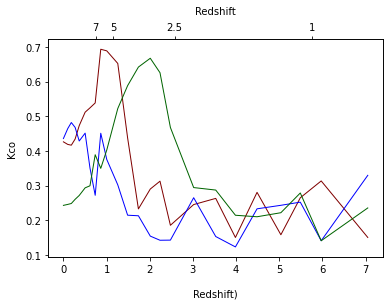

In [101]:
import matplotlib.pyplot as plt
%matplotlib inline
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
cosmology = FlatLambdaCDM(H0=70*u.km/u.s/u.Mpc, Om0=0.3)
cosmology.age(0)
import numpy as np



fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)
ax2 = ax1.twiny()


# Plot instructions 
ax1.plot(redshifts[0,0:],kco_s[0,0:], linewidth=1, color='maroon', label='Early')
ax1.plot(redshifts[1,0:],kco_s[1,0:], linewidth=1, color='blue', label='Late')
ax1.plot(redshifts[2,0:],kco_s[2,0:], linewidth=1, color='darkgreen', label='Organic')
ax1.set_xlabel('Redshift)', rotation=0, labelpad=15)
ax1.set_ylabel('Kco', rotation=90, labelpad=8)

# Define a flat Lambda-CDM cosmology with parameters mentioned in Schaye et al. 2015
zvals = np.array([0.0,0.125,0.25,0.5,1.0,2.5,5.0,7.0]) # Redshift tick values
time_in_Gyr = cosmology.age(zvals).value  # Lookback time corresponding to redshift tick values
ax2.set_xticks(time_in_Gyr) # Position ticks at lookback times corresponding to redshift tick values
ax2.set_xticklabels('{:g}'.format(z) for z in zvals) # Rename lookback time ticks to corresponding redshift values
ax2.set_xlim(ax1.get_xlim()) # Set equal axis limits for the two x-axes
ax2.set_xlabel('Redshift', rotation=0, labelpad=8)


(<function matplotlib.pyplot.show(close=None, block=None)>,)

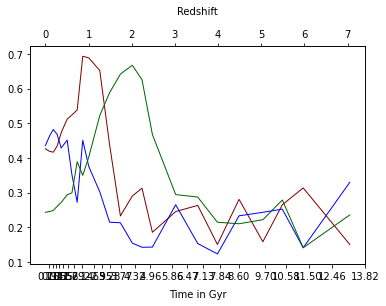

In [247]:
import h5py
import matplotlib.pyplot as plt
import os
from os import listdir
from mpl_toolkits import mplot3d
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd
import astropy
import astropy.units as u
import astropy.cosmology
from astropy.cosmology import z_at_value
from astropy.cosmology import FlatLambdaCDM

    
fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)
ax2 = ax1.twiny()

cosmology = FlatLambdaCDM(100.*0.6777,Om0=0.307,Ob0=0.04825)
cosmo.age(0)
import pandas as pd
from pandas import DataFrame
import csv
df_redshifts = pd.read_csv(r'C:\Users\katha\Desktop\Masters\Project\Halo Catalogue New\halo_catalogue_gm_early_new.txt', delim_whitespace=True, header=None, skiprows=(0, 0), names=['Index','Time (Gyr)','a_exp','redshift','subhalo centre X','subhalo centre Y','subhalo centre Z','subhalo peculiar velocity X','subhalo peculiar velocity Y','subhalo peculiar velocity Z','Halo mass','Stellar mass','BH mass','SFR','sSFR'])
df_redshifts2 = df_redshifts['redshift'].to_numpy()
#print(df_redshifts)
time_in_Gyr = cosmology.age(df_redshifts2).value  # Lookback time corresponding to redshift tick values
#rint(df_redshifts2)
#rint(time_in_Gyr)

# Plot instructions 
ax2.plot(redshifts[0,0:],kco_s[0,0:], linewidth=1, color='maroon', label='Early')
ax2.plot(redshifts[1,0:],kco_s[1,0:], linewidth=1, color='blue', label='Late')
ax2.plot(redshifts[2,0:],kco_s[2,0:], linewidth=1, color='darkgreen', label='Organic')
ax2.set_xlabel('Redshift', rotation=0, labelpad=15)
ax2.set_ylabel('Kco', rotation=90, labelpad=9)
ax1.set_xticks(time_in_Gyr) # Position ticks at lookback times corresponding to redshift tick values
ax1.set_xlabel('Time in Gyr', rotation=0, labelpad=8)
# ax2.set_xticks(time_in_Gyr) # Position ticks at lookback times corresponding to redshift tick values
# ax2.set_xticklabels('{:g}'.format(z) for z in zvals) # Rename lookback time ticks to corresponding redshift values
# ax2.set_xlim(ax1.get_xlim()) # Set equal axis limits for the two x-axes
# ax1.set_xlim(0, 13)
# ax1.set_ylim(0, 0.8)
# ax2.set_xlim(0,8)
plt.show,